# S&P500 Stock Price Indicator
Group Members: Pranav Chavali, Tejas Iyer, Pranav Peddamalla, Adithya Pradosh

# Introduction
The main purpose of this project is to journey through the entirety of the data science life cycle. To accomplish this we have chosen to use a data set which keeps track of S&P500 stock prices from 2014 to 2017 with an attempt to create a predictor/indicator for a particular stock. Stock trading is a prevalent occupation around the world and traders use a plethora of indicators such as RSI (relative strength index), ADI (Average directional index), and many others

This is important because it has direct effects on our economy. If an indicator with high accuracy can be made this will benefit both businesses and the trader as they both will be making profits. We have also seen the negative side to this where people lose their money and we want to prevent this by creating an accurate indicator. This can be accomplished by using a large dataset which displays the historical changes for a given stock. By analyzing past trends in the market, we can begin to predict future market growth and create indicators that better fit to our data

Although, we note that it is important to consider that stock predictors are seldom as accurate as they are intended to be. After all, if it was easy to predict the price of stocks, everyone would be a millionaire. 

There are a number of different factors that play into affecting the price of a stock. A number of these factors are intangible, and unable to be measured or manipulated as quantitative data. One example of this is news regarding a stock: when new information regarding a company is released to the public, it can have a significant impact on its stock price. After all, the price of a stock directly reflects the trust and confidence that investors have in a given product at a given time. So if news comes out which influences an investors thoughts on whether to hold or sell, this can be directly reflected in the stock price as investor’s confidence in a stock beings to either waver or intensify. 

With this being said, our project intends to compare a number of well performing stocks from the S&P500, an index containing the top 500 leading publicly-traded companies in the USA to each other, as well as the S&P500 itself. Afterwords, we train a model using [INSERT MODEL HERE] to predict future stock price trends for a select few companies. 

For the companies, we chose to narrow down on 4 companies which are Apple, Starbucks, Amazon and Microsoft. These are very well known companies which majority of people know about. Apple and Microsoft are leading tech companies, Starbucks is one of the worlds leading coffee shops and Amazon is the leading e-commerce store in the world.

Throughout this project, we will go through the following stages (each item in this list will link to its respective code segments)
1. Data Collection
2. Data Processing
3. Exploratory Analysis & Data Visualization
4. Model: Analysis, Hypothesis, & ML
5. Interpretation: Insight & Policy Decision

In [1]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates

This code performs data collection and preprocessing for multiple stocks, including S&P 500, Apple, Starbucks, Amazon, and Microsoft. It reads CSV files containing historical stock price data for each company and removes any rows with missing values using dropna. It also scrapes the S&P 500 historical prices table from a website and stores the data in a pandas DataFrame called sp_data. Overall, this code aims to gather and clean stock price data for further analysis or modeling.

# Data Collection:

Data Collection for Explanatory Analysis and Data Visualization: [EXPLAIN CODE HERE]

In [3]:
# s&p data
sp = pd.read_csv('stock prices.csv')
sp = sp.dropna()

# apple data
apple = pd.read_csv('apple five year data.csv')
apple = apple.dropna()

# starbucks data
starbucks = pd.read_csv('starbucks five year data.csv')
starbucks = starbucks.dropna()

# amazon data
amazon = pd.read_csv('amazon five year data.csv')
amazon = amazon.dropna()

# microsoft data
microsoft = pd.read_csv('microsoft five year data.csv')
microsoft = microsoft.dropna()

# web scraping s&p changes over years
url = 'https://www.multpl.com/s-p-500-historical-prices/table/by-month'
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36',
    'From': 'stopdenyingme@gmail.com'
}
r = requests.get(url, headers=headers)

page = BeautifulSoup(r.content, 'lxml')
sp_data = pd.read_html(str(page.find('table')))[0]
sp_data.columns = ['Date', 'Price']
sp_data.index = sp_data.index + 1

Data Collection For Machine Learning: [Explain Code Here]

Apple Data:

In [4]:
# Get the Dataset
dataset = pd.read_csv('HistoricalData_1683500505754.csv')


Amazon Data:

In [56]:
# Get the Dataset
dataset2 = pd.read_csv('HistoricalData_1683662795655.csv')


# Data Preprocessing:

The code here performs are more extensive analysis on the data we collected in the previous cell. We take the data from each company and construct plots/tables about specific aspects regarding each company. For the plots, we plot the average close/last price over the last 5 years to see the companies overall improvement. In the tables at the end, we show each companies close/last price currently and their market cap which provides us more insights regarding the company. 

Data Pre Processing For Explanatory Data Analysis and Data Visualization:

In [5]:
# all the pre processing done for Apple data set
apple_dates = list(apple['Date'])
apple_years = []

# adding all the years stripping out the MM/DD/ part of the date
for date in apple_dates:
  apple_years.append(date[6::])

# adding the new column to data set
apple['Year'] = apple_years
apple = apple[['Year', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']]

# getting all the average close/last prices and storing in an array
apple_avgs = []
for year in sorted(set(apple_years)):
  total = 0
  # temp data set which corresponds to each year in the 5 year average
  temp = apple.loc[apple['Year'] == str(year)]
  close_last = list(temp['Close/Last'])
  for val in close_last:
    total += float(val[1::])

  apple_avgs.append(total / len(close_last))

In [6]:
# all the pre processing done for Starbucks data set
starbucks_dates = list(starbucks['Date'])
starbucks_years = []

# adding all the years stripping out the MM/DD/ part of the date
for date in starbucks_dates:
  starbucks_years.append(date[6::])

# adding the new column to data set
starbucks['Year'] = starbucks_years
starbucks = starbucks[['Year', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']]

# getting all the average close/last prices and storing in an array
starbucks_avgs = []
for year in sorted(set(starbucks_years)):
  total = 0
  # temp data set which corresponds to each year in the 5 year average
  temp = starbucks.loc[starbucks['Year'] == str(year)]
  close_last = list(temp['Close/Last'])
  for val in close_last:
    total += float(val[1::])

  starbucks_avgs.append(total / len(close_last))

In [7]:
# all the pre processing done for Amazon data set
amazon_dates = list(amazon['Date'])
amazon_years = []

# adding all the years stripping out the MM/DD/ part of the date
for date in amazon_dates:
  amazon_years.append(date[6::])

# adding the new column to data set
amazon['Year'] = amazon_years
amazon = amazon[['Year', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']]

# getting all the average close/last prices and storing in an array
amazon_avgs = []
for year in sorted(set(amazon_years)):
  total = 0
  # temp data set which corresponds to each year in the 5 year average
  temp = amazon.loc[amazon['Year'] == str(year)]
  close_last = list(temp['Close/Last'])
  for val in close_last:
    total += float(val[1::])

  amazon_avgs.append(total / len(close_last))

In [8]:
# all the pre processing done for Microsoft data set
microsoft_dates = list(microsoft['Date'])
microsoft_years = []

# adding all the years stripping out the MM/DD/ part of the date
for date in microsoft_dates:
  microsoft_years.append(date[6::])

# adding the new column to data set
microsoft['Year'] = microsoft_years
microsoft = microsoft[['Year', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']]

# getting all the average close/last prices and storing in an array
microsoft_avgs = []
for year in sorted(set(microsoft_years)):
  total = 0
  # temp data set which corresponds to each year in the 5 year average
  temp = microsoft.loc[microsoft['Year'] == str(year)]
  close_last = list(temp['Close/Last'])
  for val in close_last:
    total += float(val[1::])

  microsoft_avgs.append(total / len(close_last))

This code here cleans the S&P 500 price data frame to obtain the years 2018-2023 to remain consistent with the companies years chosen. This is done to get a 5 year average plot of the S&P 500 so we can see how the overall market has been doing compared to each individual company

In [9]:
pd.options.mode.chained_assignment = None

# Cleaning/Filtering through the S&P Data to get the relevant information we need
sp_dates = list(sp_data['Date'])
sp_years = []
for date in sp_dates:
  # stripping the MM/DD part of the date to get just the years
  sp_years.append(date[-4:])

# adding the column to the dataframe to be used in later computation
sp_data['Year'] = sp_years
# converting all years to ints
sp_data['Year'] = sp_data['Year'].astype(int)
# dropping all columns that are before 2018
sp_data = sp_data[sp_data['Year'] >= 2018]

# getting the five year average price increase for the S&P 500
sp_fives = list(sp_data['Year'])
sp_avgs = []
for year in sorted(set(sp_fives)):
  total = 0
  temp = sp_data.loc[sp_data['Year'] == year]
  prices = list(temp['Price'])
  for price in prices:
    total += float(price)

  # list of averages
  sp_avgs.append(total / len(prices))

Data Pre Processing For ML and Hyothesis Testing:

Here we will be preprocessing the values in our dataset. A number of the stock price columns across all of our datasets seem to be prepended by a '\$' symbol (ex. \$107.4). This symbol makes it difficult to treat the stock price values as float values that can be easily compared with each other. This function can be passed in to the .apply function to modify the columns of our choice to remove the prepended '\$' symbol. 

In [10]:
def process_values(money_val):
  # remove the $ sign (pre processing)
  corrected_val = str(money_val)[1:]
  return float(corrected_val)

Here we further pre-process for the ML Model. As it stands, the dataset is hard to read and not very conducive to being easily read. For this reason, we will be making the dataframe nicer to look at. We will be changing the name of the Close/Last colum to just close because it is easier to read. Furthermore, we will rearrange the order of the columns in the dataframe to be 'Date', 'Open', 'High', 'Low', 'Close', then 'Volume'.  Lastly we will be applying the function that we created previously which removes the '\$' symbol from the stock price columns in the dataframe in order to remove the '\$' symbol from the appropriate columns in the dataframe.  

In [11]:
# Data Pre-Prcessing:
dataset.rename(columns = {'Close/Last':'Close'}, inplace = True)
cols = dataset.columns.tolist()
cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
dataset = dataset[cols]

dataset['Open'] = dataset['Open'].apply(process_values)
dataset['High'] = dataset['High'].apply(process_values)
dataset['Low'] = dataset['Low'].apply(process_values)
dataset['Close'] = dataset['Close'].apply(process_values)


Apple Data Preprocessing:

Here we will be splitting up the Apple dataset into a train and test split (our model does not require the explicit input of a validation test set). For the apple LSTM model, we wish to train on data until 2019, and use that information to predict the performance of the stock to date (May 2023). 

In [12]:
# Split the data into a pre 2019 set and a post
dataset_train = dataset[1100:]
dataset_test = dataset[0:1100]

dataset_train = dataset_train.iloc[::-1]
dataset_test = dataset_test.iloc[::-1]

# Train Data
print(dataset_train.head())
# Test Data
print(dataset_test.head())

            Date     Open     High      Low    Close     Volume
2517  05/07/2013  16.6061  16.6339  16.2036  16.3806  481870287
2516  05/08/2013  16.3943  16.6204  16.2789  16.5657  471911251
2515  05/09/2013  16.4218  16.5357  16.2707  16.3132  397792761
2514  05/10/2013  16.3561  16.4182  16.0886  16.1775  334460986
2513  05/13/2013  16.1254  16.3536  16.1250  16.2407  316864673
            Date     Open     High      Low    Close     Volume
1099  12/21/2018  39.2150  39.5400  37.4075  37.6825  381991600
1098  12/24/2018  37.0375  37.8875  36.6475  36.7075  148676920
1097  12/26/2018  37.0750  39.3075  36.6800  39.2925  232535400
1096  12/27/2018  38.9600  39.1925  37.5175  39.0375  206435400
1095  12/28/2018  39.3750  39.6300  38.6375  39.0575  166962400


Amazon Data Pre Processing:

Here we will be splitting up the Apple dataset into a train and test split (our model does not require the explicit input of a validation test set). For the apple LSTM model, we wish to train on data until 2020, and use that information to predict the performance of the stock to date (May 2023). 

In [57]:
# Split the data into a pre 2020  set and a post
dataset2_train = dataset2[855:]
dataset2_test = dataset2[0:855]

dataset2_train = dataset2_train.iloc[::-1]
dataset2_test = dataset2_test.iloc[::-1]

# Train Data
print(dataset2_train.head())
print()
# Test Data
print(dataset2_test.head())

            Date Close/Last    Volume      Open      High       Low
2516  05/09/2013    $13.008  55385100  $12.9365  $13.1775   $12.844
2515  05/10/2013   $13.1815  62894380   $13.044  $13.1825  $13.0105
2514  05/13/2013   $13.2255  42987960  $13.1385   $13.294    $13.10
2513  05/14/2013   $13.4165  53975340   $13.225    $13.47  $13.2014
2512  05/15/2013    $13.328  54391740  $13.3535  $13.4525   $13.228

           Date Close/Last    Volume      Open      High       Low
854  12/13/2019    $88.047  54958180    $88.25  $88.4495    $87.75
853  12/16/2019   $88.4605  62986900    $88.35   $88.475  $87.8525
852  12/17/2019    $89.533  72933940  $88.9005    $89.60  $88.8695
851  12/18/2019   $89.2015  67082740   $89.751    $89.91   $89.118
850  12/19/2019    $89.614  54766400   $89.025  $89.6495   $88.703


These next parts involve some web scraping to collect current data to construct tables pertaining to specific attriubtes about the companies. Since we plotted the 5 year average closing/last price for each company, we now want to see if the current real time close/last price has changed. We are also showing their market cap as this also provides insights towards the companies growth

Collecting current Amazon data
* https://finance.yahoo.com/quote/AMZN/

In [13]:
# web scraping current Amazon data off of Yahoo Finance 
amzn_url = 'https://finance.yahoo.com/quote/AMZN/'

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36',
    'From': 'stopdenyingme@gmail.com'
}
ret = requests.get(amzn_url, headers=headers)

page = BeautifulSoup(ret.content, 'lxml')

# finding the table
amzn_data = pd.read_html(str(page.find_all('table')))[0]
amzn_data.columns = ['Label', 'Value']

# getting the second table
amzn_data2 = pd.read_html(str(page.find_all('table')))[1]
amzn_data2.columns = ['Label', 'Value']

# getting the previous close data and market cap data for tables
amzn_prev_close = float(amzn_data['Value'][0])
amzn_market_cap = amzn_data2['Value'][0]

Collecting current Apple data
* https://finance.yahoo.com/quote/AAPL?p=AAPL&ncid=yahooproperties_peoplealso_km0o32z3jzm

In [14]:
# This processing is similar to the Amazon web scraping

apple_url = 'https://finance.yahoo.com/quote/AAPL?p=AAPL&ncid=yahooproperties_peoplealso_km0o32z3jzm'

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36',
    'From': 'stopdenyingme@gmail.com'
}
ret = requests.get(apple_url, headers=headers)

page = BeautifulSoup(ret.content, 'lxml')

apple_data = pd.read_html(str(page.find_all('table')))[0]
apple_data.columns = ['Label', 'Value']

apple_data2 = pd.read_html(str(page.find_all('table')))[1]
apple_data2.columns = ['Label', 'Value']

apple_prev_close = float(apple_data['Value'][0])
apple_market_cap = apple_data2['Value'][0]

Collecting current Starbucks data
* https://finance.yahoo.com/quote/SBUX?p=SBUX&.tsrc=fin-srch



In [15]:
starbucks_url = 'https://finance.yahoo.com/quote/SBUX?p=SBUX&.tsrc=fin-srch'

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36',
    'From': 'stopdenyingme@gmail.com'
}
ret = requests.get(starbucks_url, headers=headers)

page = BeautifulSoup(ret.content, 'lxml')

starbucks_data = pd.read_html(str(page.find_all('table')))[0]
starbucks_data.columns = ['Label', 'Value']

starbucks_data2 = pd.read_html(str(page.find_all('table')))[1]
starbucks_data2.columns = ['Label', 'Value']

starbucks_prev_close = float(starbucks_data['Value'][0])
starbucks_market_cap = starbucks_data2['Value'][0]

Collecting current Microsoft data
* https://finance.yahoo.com/quote/MSFT?p=MSFT&.tsrc=fin-srch

In [16]:
microsoft_url = 'https://finance.yahoo.com/quote/MSFT?p=MSFT&.tsrc=fin-srch'

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36',
    'From': 'stopdenyingme@gmail.com'
}
ret = requests.get(microsoft_url, headers=headers)

page = BeautifulSoup(ret.content, 'lxml')

microsoft_data = pd.read_html(str(page.find_all('table')))[0]
microsoft_data.columns = ['Label', 'Value']

microsoft_data2 = pd.read_html(str(page.find_all('table')))[1]
microsoft_data2.columns = ['Label', 'Value']

microsoft_prev_close = float(microsoft_data['Value'][0])
microsoft_market_cap = microsoft_data2['Value'][0]

This is some helper code which converts all the market caps to one unit which makes it easier to sort in the table we later construct which has sorted values

In [17]:
# This will multiply the value by a scalar based on its suffix
multipliers = {'B': 1e-3, 'T': 1}

# Helper function to convert every value to one unit (trillion) for sorting
def to_trillion(value):
  suffix = value[-1]
  mult = multipliers[suffix]
  val = float(value[:-1])
  return val * mult

This code constructs the tables we are interested in

In [18]:
# lists of data for the data frame 
companies = ['Amazon', 'Apple', 'Starbucks', 'Microsoft']
market_caps = [amzn_market_cap, apple_market_cap, starbucks_market_cap, microsoft_market_cap]
prev_closes = [amzn_prev_close, apple_prev_close, starbucks_prev_close, microsoft_prev_close]

# creating both data frames
data = {'Company': companies, 'Market Cap': market_caps}
data2 = {'Company': companies, 'Prev Close Price': prev_closes}

# sorting values in the market cap dataframe
market_cap_df = pd.DataFrame(data)
market_cap_df['Market Cap'] = market_cap_df['Market Cap'].apply(to_trillion)
market_cap_df = market_cap_df.sort_values(by='Market Cap', ignore_index=True)
market_cap_df.columns = ['Company', 'Market Cap (Trillion)']

# sorting by previous close price
prev_close_df = pd.DataFrame(data2)
prev_close_df = prev_close_df.sort_values(by='Prev Close Price', ignore_index=True)

# Exploratory Analysis & Data Visualization

In the next few cells we are creating a plot for each company which plots their average close/last price in the last 5 years and this will be later compared with their current real time close/last price which will be in the form of a table

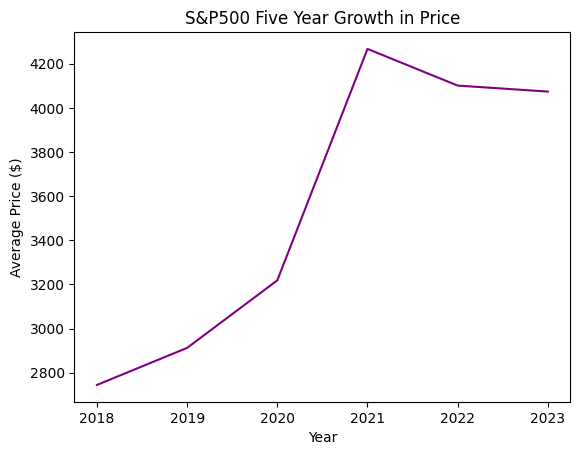

In [19]:
# Creating the plot for the S&P500
plt.plot(list(sorted(set(sp_fives))), sp_avgs, color='Purple')
plt.ylabel('Average Price ($)')
plt.xlabel('Year')
plt.title('S&P500 Five Year Growth in Price')
plt.show()

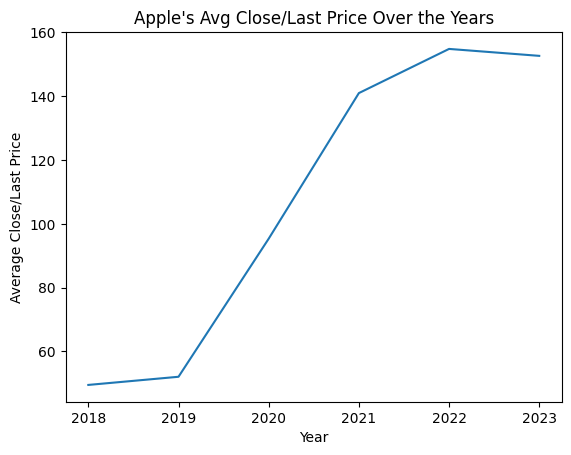

In [20]:
# Creating the plot for Apple
plt.plot(list(sorted(set(apple_years))), apple_avgs)
plt.ylabel("Average Close/Last Price")
plt.xlabel("Year")
plt.title("Apple's Avg Close/Last Price Over the Years")
plt.show()

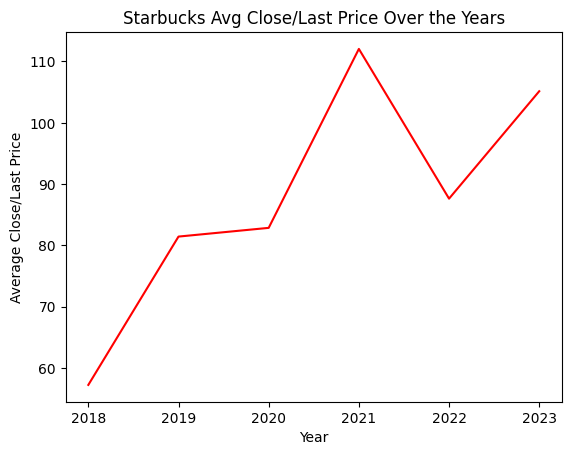

In [21]:
# Creating the plot for Starbucks
plt.plot(list(sorted(set(starbucks_years))), starbucks_avgs, color='red')
plt.ylabel("Average Close/Last Price")
plt.xlabel("Year")
plt.title("Starbucks Avg Close/Last Price Over the Years")
plt.show()

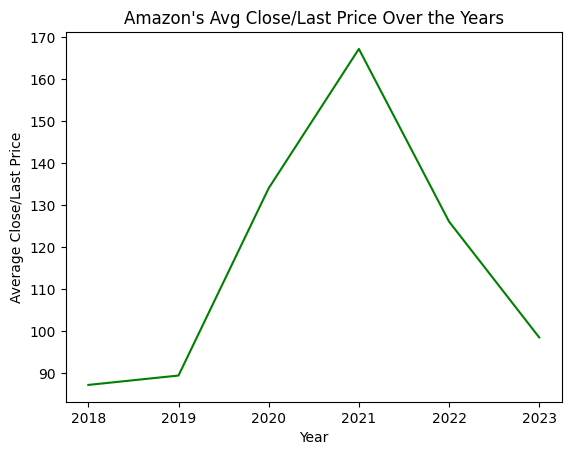

In [22]:
# Creating the plot for Amazon
plt.plot(list(sorted(set(amazon_years))), amazon_avgs, color='green')
plt.ylabel("Average Close/Last Price")
plt.xlabel("Year")
plt.title("Amazon's Avg Close/Last Price Over the Years")
plt.show()

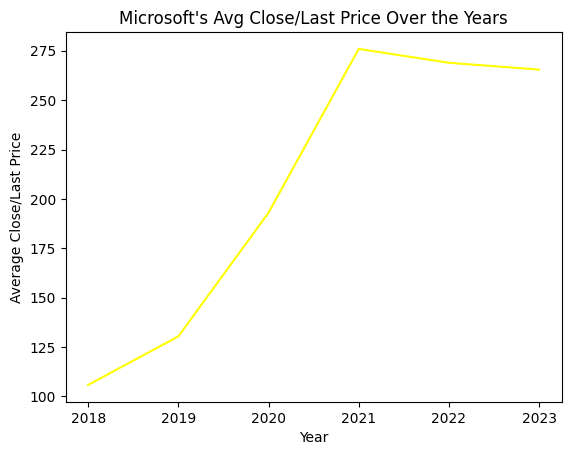

In [23]:
# Creating the plot for Microsoft
plt.plot(list(sorted(set(microsoft_years))), microsoft_avgs, color='yellow')
plt.ylabel("Average Close/Last Price")
plt.xlabel("Year")
plt.title("Microsoft's Avg Close/Last Price Over the Years")
plt.show()

<ipython-input-24-afd4141c1808>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Close/Last'] = data['Close/Last'].str.replace('$', '').astype(float)


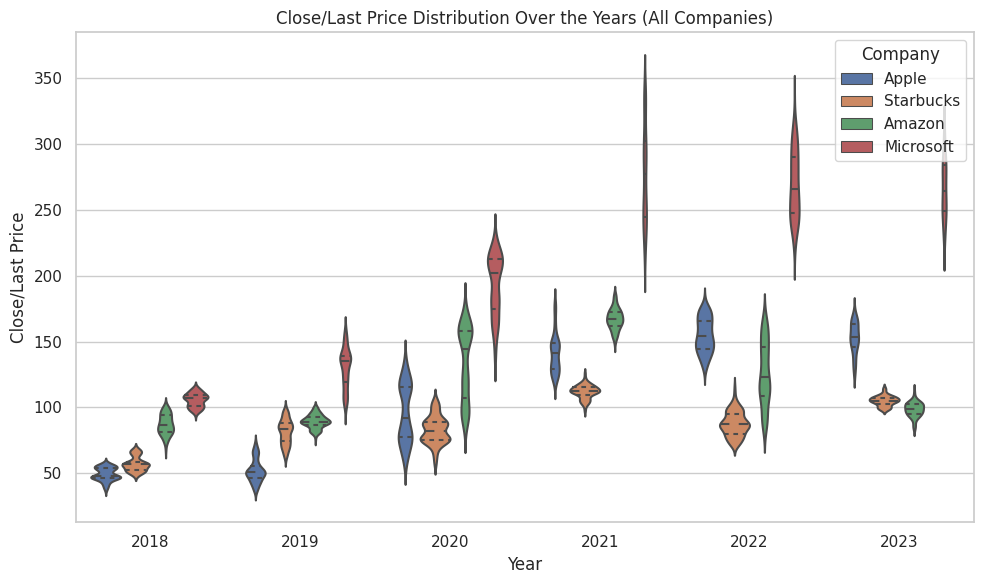

In [24]:
# Add 'Company' column to individual company datasets
apple['Company'] = 'Apple'
starbucks['Company'] = 'Starbucks'
amazon['Company'] = 'Amazon'
microsoft['Company'] = 'Microsoft'

# Combine the data for all companies
data = pd.concat([apple, starbucks, amazon, microsoft])

# Convert 'Year' and 'Close/Last' columns to numeric
data['Year'] = pd.to_numeric(data['Year'])
data['Close/Last'] = data['Close/Last'].str.replace('$', '').astype(float)

# Set up the plot
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Create the violin plot
sns.violinplot(data=data, x='Year', y='Close/Last', hue='Company', inner='quartile')
plt.xlabel('Year')
plt.ylabel('Close/Last Price')
plt.title('Close/Last Price Distribution Over the Years (All Companies)')
plt.legend(title='Company')

# Adjust the plot layout
plt.tight_layout()

# Show the plot
plt.show()

This violin plot, 

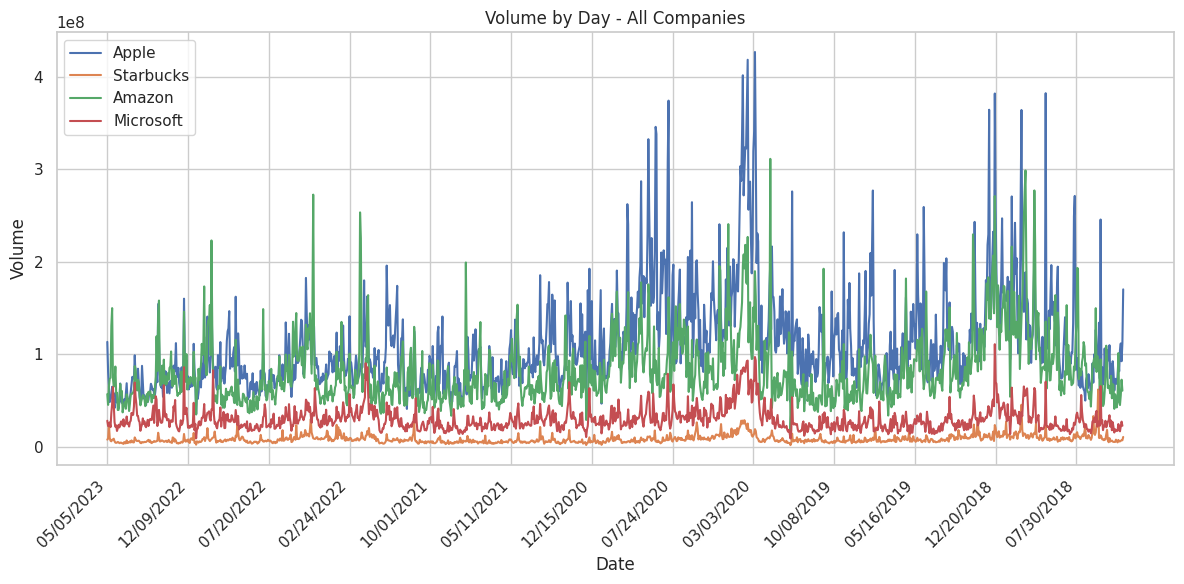

In [25]:
plt.figure(figsize=(12, 6))

# Select every 10th date for plotting
x_ticks = apple['Date'][::100]

# Plotting Volume by Day for Apple
plt.plot(apple['Date'], apple['Volume'], label='Apple')

# Plotting Volume by Day for Starbucks
plt.plot(starbucks['Date'], starbucks['Volume'], label='Starbucks')

# Plotting Volume by Day for Amazon
plt.plot(amazon['Date'], amazon['Volume'], label='Amazon')

# Plotting Volume by Day for Microsoft
plt.plot(microsoft['Date'], microsoft['Volume'], label='Microsoft')

# plot labels and legends for visuals
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume by Day - All Companies')
# Set custom x-axis ticks
plt.xticks(x_ticks, rotation=45, ha='right')  
plt.legend()
# Adjust spacing
plt.tight_layout()
plt.show()


The tables we previously constructed are being displayed here after cleaning and sorting values

In [26]:
market_cap_df

,Company,Market Cap (Trillion)
0,Starbucks,0.121094
1,Amazon,1.151000
2,Microsoft,2.306000
3,Apple,2.733000


In [27]:
prev_close_df

,Company,Prev Close Price
0,Starbucks,106.44
1,Amazon,110.19
2,Apple,173.55
3,Microsoft,312.31


In [28]:
def plotYear(df, year, ax):
  y = df[df['Date'].str[6:] == year]['Open'].iloc[::-1].values
  x = np.arange(len(y))
  m, b = np.polyfit(x, y, 1)
  ax.plot(x, y)
  ax.plot(x, m*x+b)
  ax.set_title(year)
  ax.set_ylabel("Price")
  ax.set_xlabel("Days")

Apple's value saw a decline in 2015 compared to previous years, due to suspicions among shareholders of iPhone market saturation.
https://time.com/4484791/apple-stock-aapl-iphone-7/

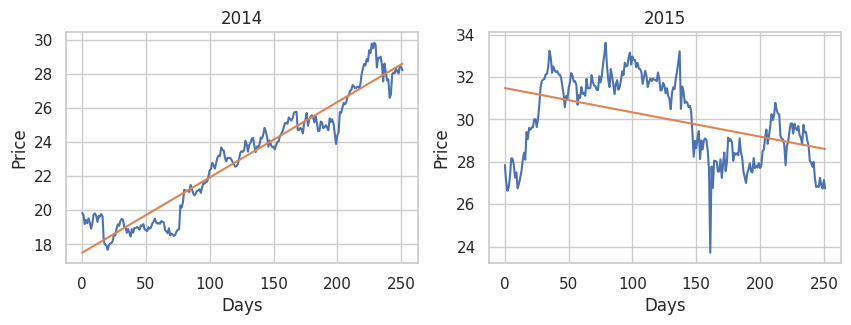

In [29]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plotYear(dataset, '2014', ax)
plotYear(dataset, '2015', ax2)

Amazon saw high levels of growth during 2020 due to the pandemic, which increased the value of online retail.

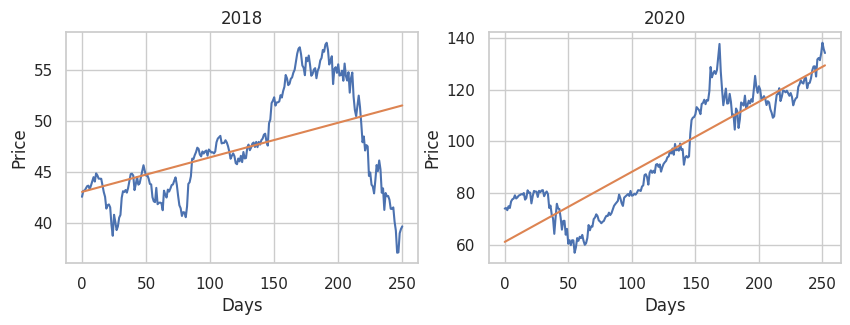

In [30]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
plotYear(dataset, '2018', ax)
plotYear(dataset, '2020', ax2)

# Machine Learning and Hypothesis Testing:

In [31]:
import seaborn as sns
import scipy
from scipy import stats
import statsmodels.api

#Hypothesis Testing:

Suppose we wish to conduct a hypothesis test in order to test the correlation between 2 different variables: trading volume and closing price. In other words, we wish to see if the price of a stock has an affect on it's volume traded. Our Null Hypothesis (H0) is the idea that stock price has no bearing on it's overall trading volume. The null hypothesis is the hypothesis that there is no signifigant correlation between 2 variables. Our Alternate Hypothesis is the idea that there is a correlation between stock price and trading value. The alternate hypothesis is a statement that contradicts the null hypothesis and suggests a significant difference or relationship between variables being studied. For our case, we will be conducting hypothesis tests to see if there is a relationship between stock price and trading volume for the companies Apple and Amazon. 


Here we will be plotting the close price of Amazon's stock (x axis) against the trading volume of the Amazon stock (y-axis). We will be fitting a regression line to this plot in order to better analyze the underlying trend of the data and visualize the overall correlation between the 2 variables. 

In [33]:
dataset = pd.read_csv('HistoricalData_1683500505754.csv')
dataset2 = pd.read_csv('HistoricalData_1683662795655.csv')
dataset3 = pd.read_csv('HistoricalData_1683660938225.csv')
# Data Pre-Prcessing:
dataset.rename(columns = {'Close/Last':'Close'}, inplace = True)
cols = dataset.columns.tolist()
cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
dataset = dataset[cols]

dataset['Open'] = dataset['Open'].apply(process_values)
dataset['High'] = dataset['High'].apply(process_values)
dataset['Low'] = dataset['Low'].apply(process_values)
dataset['Close'] = dataset['Close'].apply(process_values)

# Data Pre-Prcessing:
dataset2.rename(columns = {'Close/Last':'Close'}, inplace = True)
cols = dataset2.columns.tolist()
cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
dataset2 = dataset2[cols]

dataset2['Open'] = dataset2['Open'].apply(process_values)
dataset2['High'] = dataset2['High'].apply(process_values)
dataset2['Low'] = dataset2['Low'].apply(process_values)
dataset2['Close'] = dataset2['Close'].apply(process_values)

# Data Pre-Prcessing:
dataset3.rename(columns = {'Close/Last':'Close'}, inplace = True)
cols = dataset3.columns.tolist()
cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
dataset3 = dataset3[cols]

dataset3['Open'] = dataset3['Open'].apply(process_values)
dataset3['High'] = dataset3['High'].apply(process_values)
dataset3['Low'] = dataset3['Low'].apply(process_values)
dataset3['Close'] = dataset3['Close'].apply(process_values)

In [34]:
print(dataset2.head())
print('')
print(dataset3.head())

         Date     Open     High       Low    Close    Volume
0  05/08/2023  105.040  106.095  104.7001  105.830  49430910
1  05/05/2023  104.270  105.760  103.5500  105.655  56951740
2  05/04/2023  104.040  105.390  103.3117  104.000  45345520
3  05/03/2023  103.735  105.960  103.2800  103.650  65051930
4  05/02/2023  101.470  103.900  101.1500  103.630  73469350

         Date     Open    High     Low   Close     Volume
0  05/08/2023  172.480  173.85  172.11  173.50   55962790
1  05/05/2023  170.975  174.30  170.76  173.57  113453200
2  05/04/2023  164.890  167.04  164.31  165.79   81235430
3  05/03/2023  169.500  170.92  167.16  167.45   65136020
4  05/02/2023  170.090  170.35  167.54  168.54   48425700


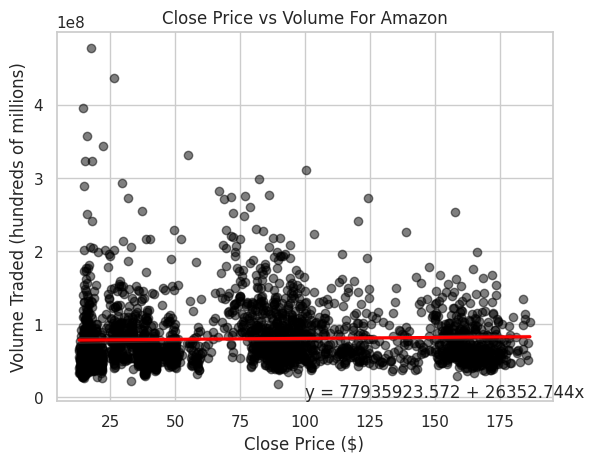

In [35]:
# AMAZON PLOT
plot = sns.regplot(x=dataset2["Close"], y=dataset2["Volume"],
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"},
            ci = 99)
plt.title('Close Price vs Volume For Amazon')
slope, intercept, r, plot, sterr = scipy.stats.linregress(x=plot.get_lines()[0].get_xdata(), 
                                            y=plot.get_lines()[0].get_ydata())

plt.text(100, 95, 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')

plt.xlabel('Close Price ($)')
plt.ylabel('Volume Traded (hundreds of millions)')
plt.show()

Below we will be conducting an OLS regression. OLS regressions typically provide information on the relationship between a dependent variable and independent variables, including coefficients, standard errors, t-values, p-values, R-squared values, residuals, and diagnostic statistics. Here in this example we will be conducting an OLS Regression in order to see if there is a a p value < 0.05, which reason that the correlation between close price of a stock and volume traded is statistically signifigant. Below we see in the chart that the p-value is 0. Since 0 is < 0.05, we can reject the Null Hypothesis and accept the alternate hypothesis which we previously mentioned states tha there is a statistically signifigant correlation between close price and trading volume.

In [36]:
ret = statsmodels.formula.api.ols(formula="Close ~ Volume", data=dataset2).fit()
print(ret.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.750
Date:                Thu, 11 May 2023   Prob (F-statistic):             0.0974
Time:                        21:29:42   Log-Likelihood:                -13525.
No. Observations:                2517   AIC:                         2.705e+04
Df Residuals:                    2515   BIC:                         2.707e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.4415      2.253     32.598      0.0

Here we will be plotting the close price of Apple's stock (x axis) against the trading volume of the Amazon stock (y-axis). We will be fitting a regression line to this plot in order to better analyze the underlying trend of the data and visualize the overall correlation between the 2 variables.  

Here we will be plotting the close price of Amazon's stock (x axis) against the trading volume of the Amazon stock (y-axis). We will be fitting a regression line to this plot in order to better analyze the underlying trend of the data and visualize the overall correlation between the 2 variables.

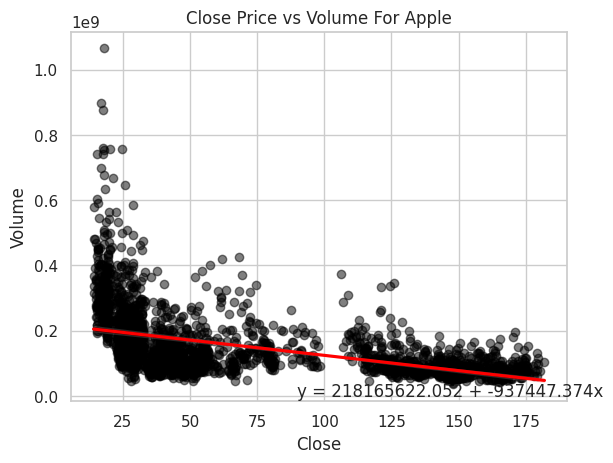

In [37]:
# APPLE PLOT
plot= sns.regplot(x=dataset3["Close"], y=dataset3["Volume"],
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"},
            ci = 99)
plt.title('Close Price vs Volume For Apple')
slope, intercept, r, plot, sterr = scipy.stats.linregress(x=plot.get_lines()[0].get_xdata(),
                                                       y=plot.get_lines()[0].get_ydata())

plt.text(90, 30000, 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')

plt.show()

Below we will be conducting an OLS regression. OLS regressions typically provide information on the relationship between a dependent variable and independent variables, including coefficients, standard errors, t-values, p-values, R-squared values, residuals, and diagnostic statistics. Here in this example we will be conducting an OLS Regression in order to see if there is a a p value < 0.05, which reason that the correlation between close price of a stock and volume traded is statistically signifigant. Below we see in the chart that the p-value is 0. Since 0 is < 0.05, we can reject the Null Hypothesis and accept the alternate hypothesis which we previously mentioned states tha there is a statistically signifigant correlation between close price and trading volume.

In [38]:
ret = statsmodels.formula.api.ols(formula="Close ~ Volume", data=dataset2).fit()
print(ret.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.750
Date:                Thu, 11 May 2023   Prob (F-statistic):             0.0974
Time:                        21:29:51   Log-Likelihood:                -13525.
No. Observations:                2517   AIC:                         2.705e+04
Df Residuals:                    2515   BIC:                         2.707e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.4415      2.253     32.598      0.0

#Machine Learning:

Here we extract the specific column that we will be using to make our predictions- the opening price column of the dataframe. We will be etracting this column of the dataframe as a list and storing it in the training set. Then we pring oout the training set and it's shape so that we can confirm they are the right size inputs for our model. 

In [39]:
training_set = dataset_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[16.6061]
 [16.3943]
 [16.4218]
 ...
 [41.345 ]
 [41.5   ]
 [40.1   ]]
(1418, 1)


Fitting ARIMA model as baseline

In [40]:
!pip install pmdarima
from pmdarima.arima import ARIMA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 51.0 MB/s eta 0:00:00


In [41]:
model = ARIMA(order=[4, 1, 3])
model.fit(training_set)
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1418
Model:               SARIMAX(4, 1, 3)   Log Likelihood               -1069.047
Date:                Thu, 11 May 2023   AIC                           2156.094
Time:                        21:30:15   BIC                           2203.401
Sample:                             0   HQIC                          2173.768
                               - 1418                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0023      0.005      0.479      0.632      -0.007       0.012
ar.L1         -0.8190      0.061    -13.473      0.000      -0.938      -0.700
ar.L2          0.5102      0.097      5.245      0.000       0.320       0.701
ar.L3          1.0221      0.061     16.651      0.000       0.902       1.142
ar.L4          0.1333      0.017      7.665      0.000       0.099       0.167
ma.L1          0.7113      0.061     11.715      0.000       0.592       0.830
ma.L2         -0.6029      0.098     -6.167      0.000      -0.795      -0.411
ma.L3         -0.9262      0.058    -15.936      0.000      -1.040      -0.812
sigma2         0.2641      0.005     51.337      0.000       0.254       0.274
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              3213.20
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               3.75   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

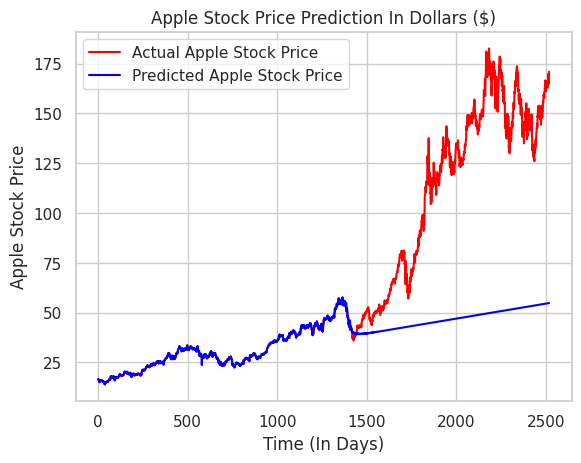

In [42]:
plt.plot(dataset.iloc[::-1].iloc[:,1:2].values, color = 'red', label = 'Actual Apple Stock Price') 
plt.plot(np.append(training_set, model.predict(n_periods = 1100)), color = 'blue', label = 'Predicted Apple Stock Price') 
plt.title('Apple Stock Price Prediction In Dollars ($)')
plt.xlabel('Time (In Days)')
plt.ylabel('Apple Stock Price')
plt.legend() 

Referenced Code and Information for the LSTM Model was take from the following sites:

https://www.analyticsvidhya.com/blog/2022/01/the-complete-lstm-tutorial-with-implementation/

https://towardsdatascience.com/simple-stock-price-prediction-with-ml-in-python-learners-guide-to-ml-76896910e2ba 

https://www.simplilearn.com/tutorials/machine-learning-tutorial/stock-price-prediction-using-machine-learning

Here we normalize the Data. This means we are basically squishing all of the data #between 0 and 1 so that it can be easily compared later on in other part of our model and for our own analysis. Take a look below at how the values look differnt now after having all been squished between 0 and 1. 

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.06013555],
       [0.05529085],
       [0.05591989],
       ...,
       [0.62601131],
       [0.62955677],
       [0.59753328]])

Here we create 2 lists which we will be using as inputs to our machine learning model: x_train and y_train. Here we populate these lists in batches of 60 elements. 

In [44]:
x_train = []
y_train = []

for i in range (60,len(dataset_train)):
  x_train.append(scaled_training_set[i-60:i,0])
  y_train.append(scaled_training_set[i,0])
  
x_train= np.array(x_train)
y_train= np.array(y_train)

Visualize the x_train and y_train lists

In [45]:
print(x_train)
print(y_train)

[[0.06013555 0.05529085 0.05591989 ... 0.04039078 0.04787284 0.051981  ]
 [0.05529085 0.05591989 0.05441707 ... 0.04787284 0.051981   0.05260545]
 [0.05591989 0.05441707 0.04914005 ... 0.051981   0.05260545 0.05444909]
 ...
 [0.94281519 0.92017    0.93692515 ... 0.65523275 0.64671222 0.62641161]
 [0.92017    0.93692515 0.94407325 ... 0.64671222 0.62641161 0.62601131]
 [0.93692515 0.94407325 0.96019937 ... 0.62641161 0.62601131 0.62955677]]
[0.05260545 0.05444909 0.05990681 ... 0.62601131 0.62955677 0.59753328]


Here we see the shapes of x_train and y_train. Seeing these, we can confirm the shapes of these liests are exactly what we require to pass into the model as imputs. 


In [46]:
print(x_train.shape)
print(y_train.shape)

(1358, 60)
(1358,)


Here we will be reshaping the x_train to include a 3rd dimention of size 1. This is to correct the shape of x_train so that it is able to be passed into the model properly as an imput that the model can take in. 


In [47]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1358, 60, 1)

Here we make a couple import statemsnts so we can use some prebuilt libraries that will make it easier for us to train and deploy our models. 

In [48]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [49]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout (0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout (0.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout (0.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout (0.2))

regressor.add(LSTM(units = 50))
regressor.add (Dropout (0.2))

regressor.add(Dense (units=1))

In [50]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(x_train, y_train, epochs=100, batch_size=32)            

Epoch 1/100
43/43 [==============================] - 16s 23ms/step - loss: 0.0192
Epoch 2/100
43/43 [==============================] - 1s 21ms/step - loss: 0.0049
Epoch 3/100
43/43 [==============================] - 1s 23ms/step - loss: 0.0046
Epoch 4/100
43/43 [==============================] - 1s 16ms/step - loss: 0.0039
Epoch 5/100
43/43 [==============================] - 1s 16ms/step - loss: 0.0042
Epoch 6/100
43/43 [==============================] - 1s 16ms/step - loss: 0.0035
Epoch 7/100
43/43 [==============================] - 1s 15ms/step - loss: 0.0033
Epoch 8/100
43/43 [==============================] - 1s 16ms/step - loss: 0.0033
Epoch 9/100
43/43 [==============================] - 1s 16ms/step - loss: 0.0032
Epoch 10/100
43/43 [==============================] - 1s 16ms/step - loss: 0.0033
Epoch 11/100
43/43 [==============================] - 1s 16ms/step - loss: 0.0031
Epoch 12/100
43/43 [==============================] - 1s 16ms/step - loss: 0.0030
Epoch 13/100
43/43 [====

In [51]:
actual_stock_price = dataset_test.iloc[:,1:2].values
print(dataset_test)

            Date      Open      High       Low     Close     Volume
1099  12/21/2018   39.2150   39.5400   37.4075   37.6825  381991600
1098  12/24/2018   37.0375   37.8875   36.6475   36.7075  148676920
1097  12/26/2018   37.0750   39.3075   36.6800   39.2925  232535400
1096  12/27/2018   38.9600   39.1925   37.5175   39.0375  206435400
1095  12/28/2018   39.3750   39.6300   38.6375   39.0575  166962400
...          ...       ...       ...       ...       ...        ...
4     05/01/2023  169.2800  170.4500  168.6400  169.5900   52472940
3     05/02/2023  170.0900  170.3500  167.5400  168.5400   48425700
2     05/03/2023  169.5000  170.9200  167.1600  167.4500   65136020
1     05/04/2023  164.8900  167.0400  164.3100  165.7900   81235430
0     05/05/2023  170.9750  174.3000  170.7600  173.5700  113453200

[1100 rows x 6 columns]


In [52]:
dataset_total = pd.concat((dataset_train [ 'Open'], dataset_test['Open']), axis=0)
inputs = dataset_total [len(dataset_total)- len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

x_test = []
for i in range(60,len(dataset_test)):
  x_test.append(inputs [i-60:i, 0])
  
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [53]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

33/33 [==============================] - 4s 10ms/step


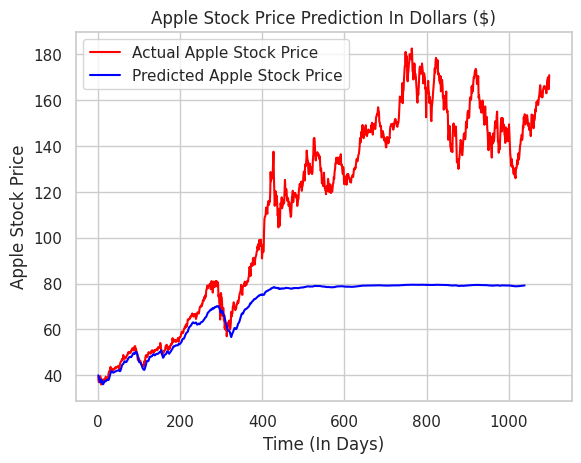

In [54]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual Apple Stock Price') 
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price') 
plt.title('Apple Stock Price Prediction In Dollars ($)')
plt.xlabel('Time (In Days)')
plt.ylabel('Apple Stock Price')
plt.legend() 

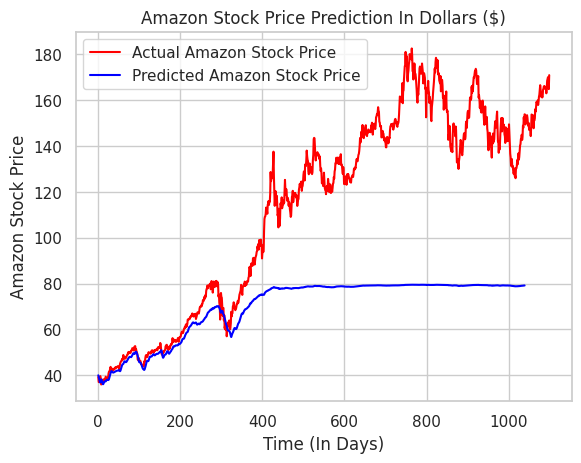

In [58]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual Amazon Stock Price') 
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Amazon Stock Price') 
plt.title('Amazon Stock Price Prediction In Dollars ($)')
plt.xlabel('Time (In Days)')
plt.ylabel('Amazon Stock Price') 
plt.legend()